In [ ]:
!pip -q install diffusers transformers accelerate torch xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.8 MB/s eta 0:00:00


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

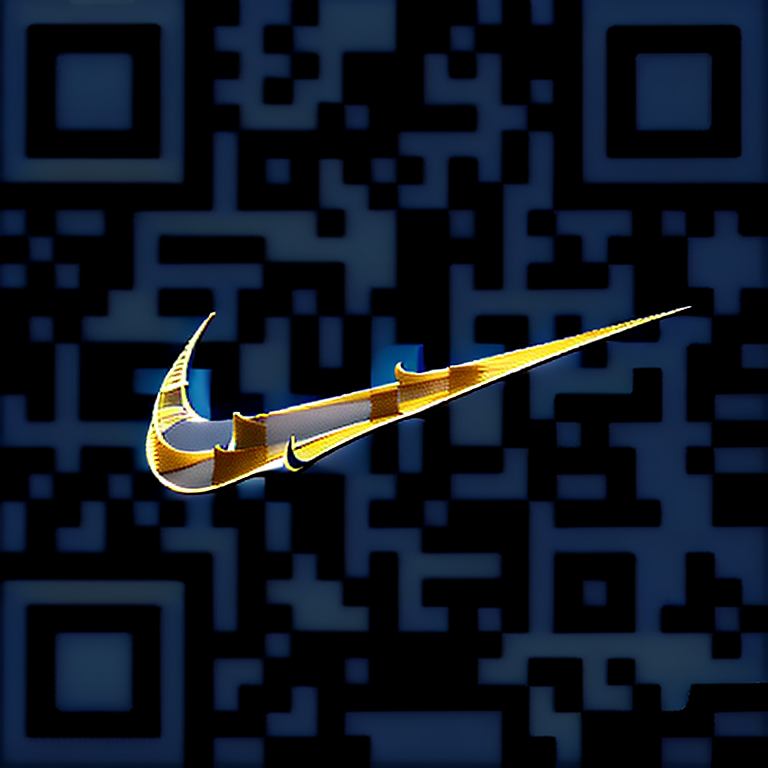

In [ ]:
"""
This a Colab that uses the "DionTimmer/controlnet_qrcode-control_v11p_sd21"
control net model from HuggingFace to generate QR Codes based on base images
and text prompts

HuggingFace link to the model
https://huggingface.co/DionTimmer/controlnet_qrcode-control_v11p_sd21

Medium Article describing this Colab in somre mored detail
https://medium.com/@ssmaameri/ai-generated-qr-codes-with-controlnet-huggingface-and-google-colab-a99ffeee2210

Powerpoint showing affects of different guidance_scale,
controlnet_conditioning_scale and strength values in the model
https://docs.google.com/presentation/d/1spTfvtorPxZ1yQTXH_tkKi32WzbusqbtStXyvlJMShk/edit?usp=sharing

"""

import torch
from PIL import Image
from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel, DDIMScheduler
from diffusers.utils import load_image
import base64
from io import BytesIO

controlnet = ControlNetModel.from_pretrained(
    "DionTimmer/controlnet_qrcode-control_v11p_sd21",
    torch_dtype=torch.float16
)

pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=torch.float16
)

pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

def resize_for_condition_image(input_image: Image, resolution: int):
    input_image = input_image.convert("RGB")
    W, H = input_image.size
    k = float(resolution) / min(H, W)
    H *= k
    W *= k
    H = int(round(H / 64.0)) * 64
    W = int(round(W / 64.0)) * 64
    img = input_image.resize((W, H), resample=Image.LANCZOS)
    return img

# qr code image
qr_code_image = load_image("/content/qr_code_no_bg.png")
qr_code_image = resize_for_condition_image(qr_code_image, 768)

# base image
base_image = load_image("/content/samurai.png")
base_image = resize_for_condition_image(base_image, 768)


# play with guidance_scale, controlnet_conditioning_scale and strength to vary
# the dominance of the QR Code vs the base image and prompt

# Approximate optimal default value
#   guidance_scale = 20,
#   controlnet_conditioning_scale = 2.0,
#   strength = 0.9

generator = torch.manual_seed(123121231)
image = pipe(
    prompt="the nike logo,  realistic, 8K, fantasy",
    negative_prompt="ugly, disfigured, low quality, blurry, nsfw",
    image=base_image,
    control_image=qr_code_image,
    width=768,
    height=768,
    guidance_scale=30,
    controlnet_conditioning_scale=2.5,
    generator=generator,
    strength=0.9,
    num_inference_steps=150
)

image.images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

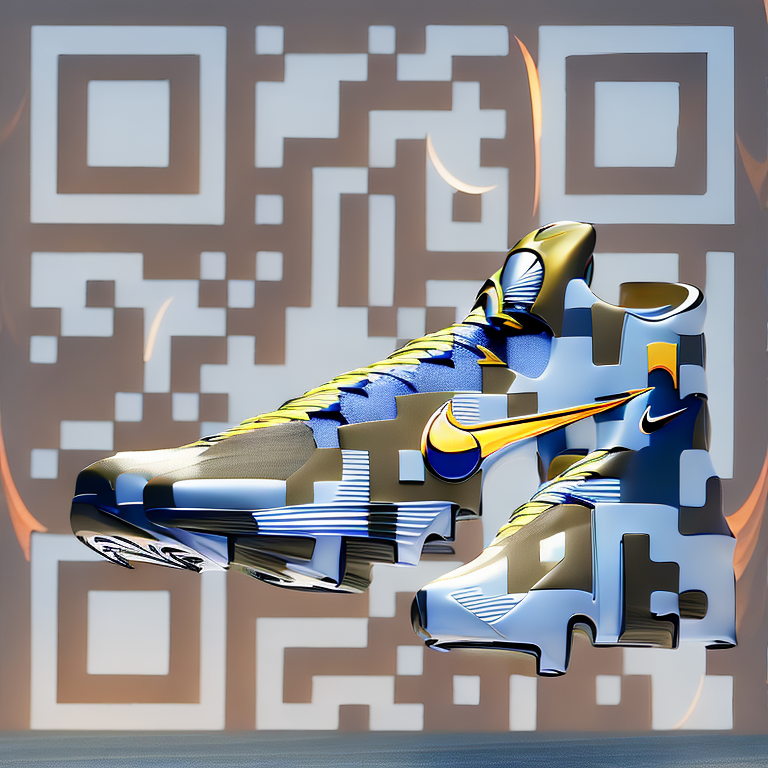

In [ ]:
qr_code_image = load_image("jordan1.png")
qr_code_image = resize_for_condition_image(qr_code_image, 768)

base_image = load_image("Jordan2.png")
base_image = resize_for_condition_image(base_image, 768)

generator = torch.manual_seed(123121231)
image = pipe(
    prompt="the nike logo,  realistic, 8K, fantasy",
    negative_prompt="ugly, disfigured, low quality, blurry, nsfw",
    image=base_image,
    control_image=qr_code_image,
    width=768,
    height=768,
    guidance_scale=30,
    controlnet_conditioning_scale=2.5,
    generator=generator,
    strength=0.9,
    num_inference_steps=150
)

image.images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

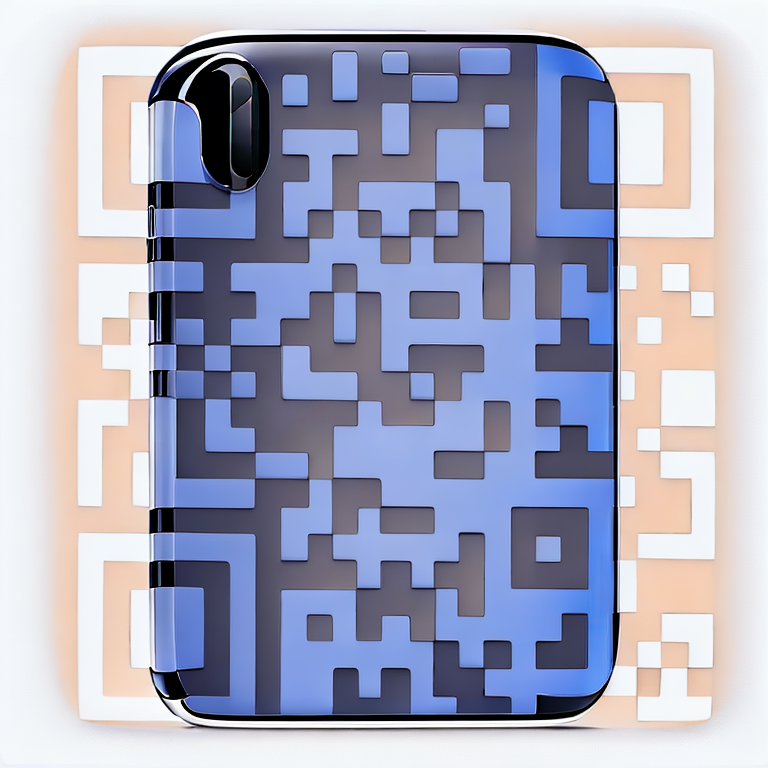

In [ ]:
qr_code_image = load_image("apple1.png")
qr_code_image = resize_for_condition_image(qr_code_image, 768)

base_image = load_image("apple2.png")
base_image = resize_for_condition_image(base_image, 768)

generator = torch.manual_seed(123121231)
image = pipe(
    prompt="iPhone, realistic, Black and White, futuristic",
    negative_prompt="ugly, disfigured, low quality, blurry, nsfw",
    image=base_image,
    control_image=qr_code_image,
    width=768,
    height=768,
    guidance_scale=30,
    controlnet_conditioning_scale=2.5,
    generator=generator,
    strength=0.9,
    num_inference_steps=150
)

image.images[0]